In [1]:
%load_ext autoreload
%autoreload 2

### Import fitting algorithm 

In [2]:
import sys
sys.path.append("/u2/pmke226/sources/hg/genetic_algorithm")
sys.path.append("/u2/pmke226/sources/hg/kmod")
sys.path.append("/u2/pmke226/sources/hg/")

In [3]:
import fittingAlgorithm as fA

## Running the fitter.
Largely described in the test1() routine in fittingAlgorithm.py 

### Import wrapper to your simulation engine

In [5]:
#import wrapper
#simulation = wrapper.Runner()

import runner
simulation = runner.Runner()

### Define inputs
- yaml file with default parameters (need not be complete)
- variedParamDict (see definition below for tips)

In [6]:
yamlVarFile = "inputParams.yaml"
variedParamList= {
  # paramDict[myVariedParam] = [variedParamTruthVal, stddev] # for log normal
  "kon":  [5.0,1.0],
}
# list of observables to be scored by GA
from fittingAlgorithm import OutputObj
outputList = {
    #"Cai":OutputObj("Cai","mean",[8,10], # in [s]
    # 0.1),          # value you want 
    "Nai":OutputObj("Nai","val_vs_time",[  0, 2],
    [1,0.5,0.15],timeInterpolations=[  0,1,2]) # check that interpolated values at 0, 100, 200 are 1, 0.5 ... 
}


### Execute fitting algorithm by passing your simulation object to fA
Note: 
for the time being, the fitting algorithm expects to receieve a data structure of the following format:

    data = dict() # This is a nuisance, but keeping backward compatible w Gotran stuff 
    data['t'] = ts
    data['Cai'] = ys[:,0]
    ...
    returnDict['data'] = data
    return returnDict

Note that we have a field for time ('t') and some field ('Cai') 

timeRange:  [0.0, 30.0]
WHY is this wrapper needed
iter 1  out of 3
Inputs:  kon 5.0
Using 5 cores for 5 jobs
Should probably rescale sigma by the tolerated error vs current error and only for selected params 
Multi-threading
Worker bee 8307, Job 0 
Worker bee 8308, Job 1 
Worker bee 8309, Job 2 
Worker bee 8310, Job 3 
Worker bee 8311, Job 4 
result:  [1.        0.3678811 0.1364234] truthValue:  [1.   0.5  0.15]
result:  [1.        0.3678811 0.1364234] truthValue:  [1.   0.5  0.15]
result:  [1.        0.3678811 0.1364234] truthValue:  [1.   0.5  0.15]
result:  [1.         0.3678811  0.13642339] truthValue:  [1.   0.5  0.15]
result:  [1.         0.36788112 0.13642339] truthValue:  [1.   0.5  0.15]
myDataFrame: 
                                                    Nai   jobID jobNum  \
0_8307  [1.0, 0.36788110442719085, 0.13642339711151058]  0_8307      0   
1_8308  [1.0, 0.36788110442660865, 0.13642340030755767]  1_8308      1   
2_8309  [1.0, 0.36788109654631906, 0.13642340367979308]  

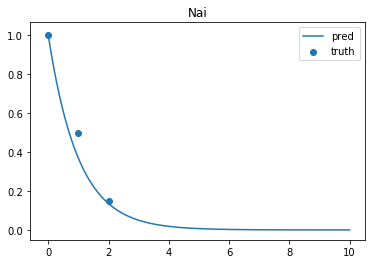

In [7]:
outputs = fA.run(
  simulation,
  yamlVarFile = yamlVarFile,  
  variedParamDict = variedParamList,
  outputList = outputList
)

In [8]:
### TODO Should return best fit params and allow you to run w them 
outputs['bestFitDict']

{'kon': 21.083914445564282}

In [9]:
fA.OutputOptimizedParams(outputs['bestFitDict'],originalYamlFile=yamlVarFile,outputYamlFile="outputParams.yaml")

Saved new outputfile with optimized parameters
